In [15]:
import pandas as pd
from langdetect import detect
from textblob import TextBlob
import matplotlib.pyplot as plt
import preparation


In [16]:
df_2014 = pd.read_excel(r'U:\data_karlijn\new-version\2014_predictors_motivation_study success.xlsx')
df_2015 = pd.read_excel(r'U:\data_karlijn\new-version\2015_predictors_motivation_study success.xlsx')
df_2016 = pd.read_excel(r'U:\data_karlijn\new-version\2016_predictors_motivation_study success.xlsx')

print("dataset 2014 unique target values:\n", df_2014['bsa_dummy'].value_counts())
print("dataset 2015 unique target values:\n", df_2015['bsa_dummy'].value_counts())
print("dataset 2016 unique target values:\n", df_2016['bsa_dummy'].value_counts())

dataset 2014 unique target values:
 1    3043
0     767
Name: bsa_dummy, dtype: int64
dataset 2015 unique target values:
 1    2327
0    1133
Name: bsa_dummy, dtype: int64
dataset 2016 unique target values:
 1    1610
0    1585
Name: bsa_dummy, dtype: int64


## swap 0 and 1 values for target column

In [17]:
df_2014['bsa_dummy'] = df_2014['bsa_dummy'].replace({0:1, 1:0})
print("dataset 2014 unique target values after swap:\n ", df_2014['bsa_dummy'].value_counts())

df_2015['bsa_dummy'] = df_2015['bsa_dummy'].replace({0:1, 1:0})
print("dataset 2014 unique target values after swap:\n ", df_2015['bsa_dummy'].value_counts())

df_2016['bsa_dummy'] = df_2016['bsa_dummy'].replace({0:1, 1:0})
print("dataset 2014 unique target values after swap:\n ", df_2016['bsa_dummy'].value_counts())

dataset 2014 unique target values after swap:
  0    3043
1     767
Name: bsa_dummy, dtype: int64
dataset 2014 unique target values after swap:
  0    2327
1    1133
Name: bsa_dummy, dtype: int64
dataset 2014 unique target values after swap:
  0    1610
1    1585
Name: bsa_dummy, dtype: int64


In [18]:
# Remove \n
df_2014 = df_2014.replace(r'\n',' ', regex=True) 
df_2015 = df_2015.replace(r'\n',' ', regex=True) 
df_2016 = df_2016.replace(r'\n',' ', regex=True) 


# dropna
df_2014.dropna(subset=["motivation", "bsa_dummy"], inplace=True)
df_2015.dropna(subset=["motivation", "bsa_dummy"], inplace=True)
df_2016.dropna(subset=["motivation", "bsa_dummy"], inplace=True)

##  Detect motivation text language

In [19]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"
    
print("Dataset_2014:\n")
df_2014['language'] = df_2014['motivation'].apply(detect_lang)
print(df_2014['language'].value_counts())

print("\n Dataset_2015:\n")
df_2015['language'] = df_2015['motivation'].apply(detect_lang)
print(df_2015['language'].value_counts())

print("\n Dataset_2016:\n")
df_2016 = df_2016.drop(df_2016[df_2016['motivation']=='.'].index)
df_2016 = df_2016.drop(df_2016[df_2016['motivation']=='..'].index)
df_2016['language'] = df_2016['motivation'].apply(detect_lang)
print(df_2016['language'].value_counts())

Dataset_2014:

nl    3807
en       2
af       1
Name: language, dtype: int64

 Dataset_2015:

nl    3252
af       1
Name: language, dtype: int64

 Dataset_2016:

nl    2886
en       1
it       1
ca       1
fi       1
Name: language, dtype: int64


In [20]:
df_2014[df_2014['language']=='en']

,studentnr_crypt,COHORT,program,field,motivation,prior_educ,previously_enrolled,multiple_requests,age,gender,HSGPA,interest,ase,reenrolled,bsa_dummy,language
1983,gz2fm6w5rbv,1,FARB,1,Now I am studying Process & Food Technology in...,3,0,0,23.0,1,NaN,1,1,1,0,en
3801,wwbm6gzgz5r,1,LASB,3,"Beste meneer/ Mevrouw, Afgelopen maanden ben ...",1,0,0,17.0,0,7.0,1,1,1,0,en


In [6]:
df_2014 = df_2014[df_2014['language']=='nl']
df_2015 = df_2015[df_2015['language']=='nl']
df_2016 = df_2016[df_2016['language']=='nl']


## Distribution of the target class

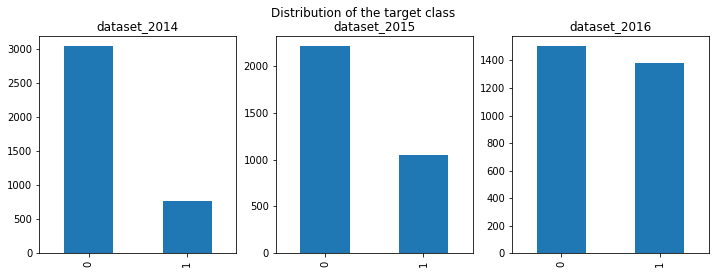

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig.suptitle('Distribution of the target class') 
axes[0].set_title("dataset_2014")
axes[1].set_title("dataset_2015")
axes[2].set_title("dataset_2016")

df_2014['bsa_dummy'].value_counts().plot.bar(ax=axes[0])
df_2015['bsa_dummy'].value_counts().plot.bar(ax=axes[1])
df_2016['bsa_dummy'].value_counts().plot.bar(ax=axes[2])


# wordcloud

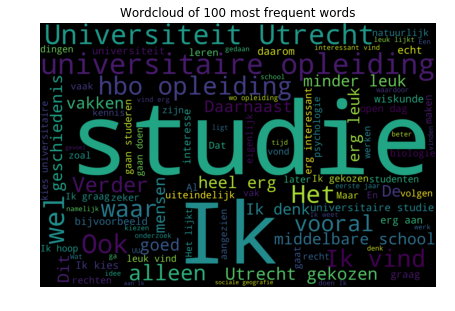

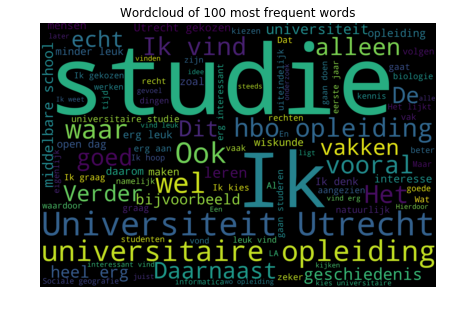

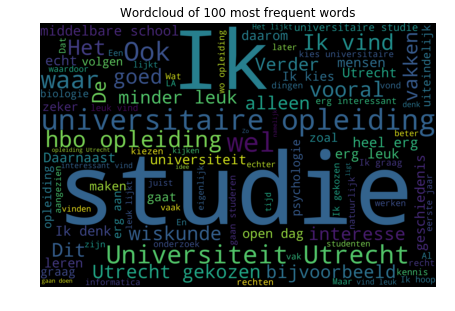

In [8]:
preparation.word_cloud(df_2014, 100)
preparation.word_cloud(df_2015, 100)
preparation.word_cloud(df_2016, 100)

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


### Classiffication report for dataset_2014

5-fold cross validation scores: [0.77855478 0.79020979 0.77803738 0.76869159 0.77570093]
average of 5-fold cross validation scores: 0.7782388950613249
Final Accuracy for SVM: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       571
           1       0.29      0.10      0.15       144

    accuracy                           0.77       715
   macro avg       0.55      0.52      0.51       715
weighted avg       0.70      0.77      0.72       715



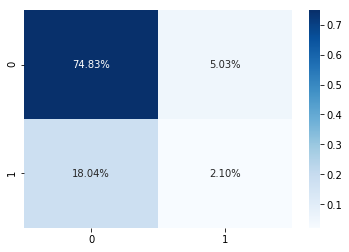

In [10]:
# keep testset apart
df_2014, df_test_2014 = train_test_split(df_2014, test_size=0.25, stratify=df_2014['bsa_dummy'], shuffle=True, random_state=0)


# seprate train/evaluation set
X_train, X_val, y_train, y_val = train_test_split(df_2014['motivation'], df_2014['bsa_dummy'], stratify=df_2014['bsa_dummy'],
                                                      test_size=0.25, random_state=0)

pipe = make_pipeline(TfidfVectorizer(), SVC( class_weight='balanced'))
scores = cross_val_score(pipe, X_train, y_train, cv = 5)
print('5-fold cross validation scores:', scores)
print('average of 5-fold cross validation scores:', scores.mean())

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_val)
print("Final Accuracy for SVM: %s" % accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions)
print(classification_report(y_val, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

Final Accuracy for SVM: 0.615546218487395
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       760
           1       0.24      0.42      0.31       192

    accuracy                           0.62       952
   macro avg       0.53      0.54      0.52       952
weighted avg       0.70      0.62      0.65       952



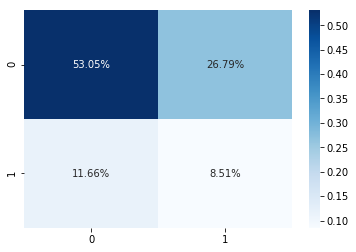

In [13]:
X_test = df_test_2014['motivation']
y_test = df_test_2014['bsa_dummy']
# tfidfvectorizer = TfidfVectorizer()
# X = tfidfvectorizer.fit_transform(X_test.values.astype('U'))
predictions = pipe.predict(X_test)
print("Final Accuracy for SVM: %s" % accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Classiffication report for dataset_2015

5-fold cross validation scores: [0.6        0.64233577 0.59124088 0.64233577 0.62408759]
average of 5-fold cross validation scores: 0.6199999999999999
Final Accuracy for SVM: 0.6353711790393013
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       311
           1       0.42      0.34      0.37       147

    accuracy                           0.64       458
   macro avg       0.56      0.56      0.56       458
weighted avg       0.62      0.64      0.62       458



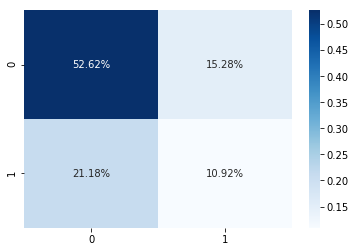

In [9]:
# keep testset apart
df_2015, df_test_2015 = train_test_split(df_2015, test_size=0.25, stratify=df_2015['bsa_dummy'], shuffle=True, random_state=0)


# seprate train/evaluation set
X_train, X_val, y_train, y_val = train_test_split(df_2015['motivation'], df_2015['bsa_dummy'], stratify=df_2015['bsa_dummy'],
                                                      test_size=0.25, random_state=0)

pipe = make_pipeline(TfidfVectorizer(), SVC(class_weight='balanced'))
scores = cross_val_score(pipe, X_train, y_train, cv = 5)
print('5-fold cross validation scores:', scores)
print('average of 5-fold cross validation scores:', scores.mean())

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_val)
print("Final Accuracy for SVM: %s" % accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions)
print(classification_report(y_val, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Classiffication report for dataset_2016

5-fold cross validation scores: [0.56830601 0.60655738 0.56830601 0.54098361 0.57692308]
average of 5-fold cross validation scores: 0.5722152164775116
Final Accuracy for SVM: 0.5868852459016394
              precision    recall  f1-score   support

           0       0.58      0.72      0.65       159
           1       0.59      0.44      0.50       146

    accuracy                           0.59       305
   macro avg       0.59      0.58      0.58       305
weighted avg       0.59      0.59      0.58       305



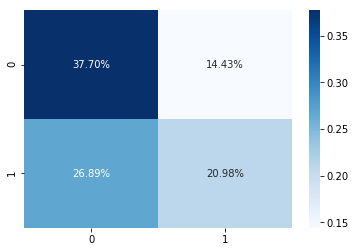

In [12]:
# keep testset apart
df_2016, df_test_2016 = train_test_split(df_2016, test_size=0.25, stratify=df_2016['bsa_dummy'], shuffle=True, random_state=0)


# seprate train/evaluation set
X_train, X_val, y_train, y_val = train_test_split(df_2016['motivation'], df_2016['bsa_dummy'], stratify=df_2016['bsa_dummy'],
                                                      test_size=0.25, random_state=0)

pipe = make_pipeline(TfidfVectorizer(), SVC())
scores = cross_val_score(pipe, X_train, y_train, cv = 5)
print('5-fold cross validation scores:', scores)
print('average of 5-fold cross validation scores:', scores.mean())

pipe.fit(X_train, y_train)
predictions = pipe.predict(X_val)
print("Final Accuracy for SVM: %s" % accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions)
print(classification_report(y_val, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

### Expremiment 2- exploratory text analysis(LIWC package)

Final Accuracy for SVM dataset_2016 using gridsearchcv: 0.5704918032786885
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       159
           1       0.56      0.51      0.53       146

    accuracy                           0.57       305
   macro avg       0.57      0.57      0.57       305
weighted avg       0.57      0.57      0.57       305



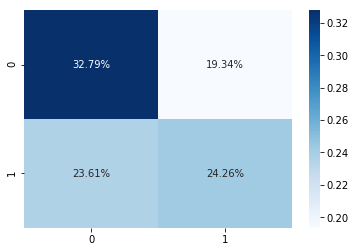

In [25]:
X_train, X_val, y_train, y_val = train_test_split(df_2016['motivation'], df_2016['bsa_dummy'], stratify=df_2016['bsa_dummy'], random_state=0)

clf = make_pipeline(TfidfVectorizer(), 
                    GridSearchCV(SVC(class_weight='balanced'),
                                 param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                                 cv=5,
                                 refit=True))

clf.fit(X_train, y_train)
predictions = clf.predict(X_val)
print("Final Accuracy for SVM dataset_2016 using gridsearchcv: %s" % accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions)
print(classification_report(y_val, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

Final Accuracy for SVM dataset_2016 using gridsearchcv: 0.5844875346260388
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       376
           1       0.57      0.57      0.57       346

    accuracy                           0.58       722
   macro avg       0.58      0.58      0.58       722
weighted avg       0.58      0.58      0.58       722



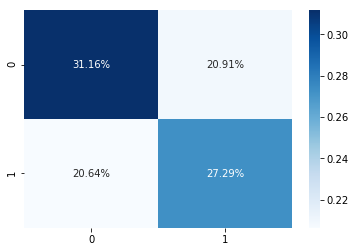

In [11]:
X_train, X_val, y_train, y_val = train_test_split(df_2016['motivation'], df_2016['bsa_dummy'], stratify=df_2016['bsa_dummy'], random_state=0)

clf = make_pipeline(TfidfVectorizer(), 
                    GridSearchCV(SVC(class_weight='balanced'),
                                 param_grid={'kernel':['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
                                 cv=5,
                                 refit=True))

clf.fit(X_train, y_train)
predictions = clf.predict(X_val)
print("Final Accuracy for SVM dataset_2016 using gridsearchcv: %s" % accuracy_score(y_val, predictions))
cm = confusion_matrix(y_val, predictions)
print(classification_report(y_val, predictions))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')